[[-4.409742 ]
 [ 1.6506683]]
[[0.01663276 0.01955949 0.02298917 0.02700366 0.03169645 0.04355464
  0.05957624 0.08735182 0.12633725 0.17930365 0.17930365 0.24816829
  0.33275777 0.42970098 0.53235368 0.63233867 0.72210555 0.79699164
  0.89961293 0.93122101 0.95339251 0.96865739 0.97903267 0.986023
  0.99590656 0.99820258 0.99880959 0.99921177]]


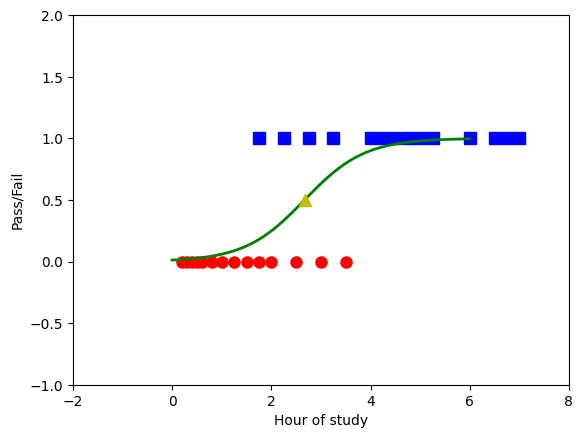

In [16]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.25, 6, 6.5, 6.75, 7]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
def sigmoid(s):      #hàm sigmoid
  return 1/(1 + np.exp(-s))
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
  w = [w_init]
  it = 0
  N = X.shape[1]
  d = X.shape[0]
  count = 0
  check_w_after = 20
  while count < max_count:
    #mix data
    mix_id = np.random.permutation(N)
    for i in mix_id:
      xi = X[:, i].reshape(d, 1)
      yi = y[i]
      zi = sigmoid(np.dot(w[-1].T, xi))
      w_new = w[-1] + eta*(yi - zi)*xi
      count +=1
      #stopping criteria
      if count%check_w_after == 0:
        if np.linalg.norm(w_new - w[-check_w_after]) < tol:
          return w
      w.append(w_new)
  return w
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)
w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])
print(sigmoid(np.dot(w[-1].T, X)))
X0 = X[1, np.where(y==0)][0]
y0 = y[np.where(y==0)]
X1 = X[1, np.where(y==1)][0]
y1 = y[np.where(y==1)]
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('Hour of study')
plt.ylabel('Pass/Fail')
plt.show()